# **Finding Correlation**


- Identify the distribution of compensation data in the dataset.

- Remove outliers to refine the dataset.

- Identify correlations between various features in the dataset.


## Hands on Lab


##### Step 1: Install and Import Required Libraries


In [1]:
# Install the necessary libraries
!pip install pandas
!pip install matplotlib
!pip install seaborn

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 142.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 192.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 169.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 153.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 92.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 138.1 MB/s eta 0:00:00


### Step 2: Load the Dataset


In [2]:
# Load the dataset from the given URL
file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
df = pd.read_csv(file_url)

# Display the first few rows to understand the structure of the dataset
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


<h3>Step 3: Analyze and Visualize Compensation Distribution</h3>


**Task**: Plot the distribution and histogram for `ConvertedCompYearly` to examine the spread of yearly compensation among respondents.


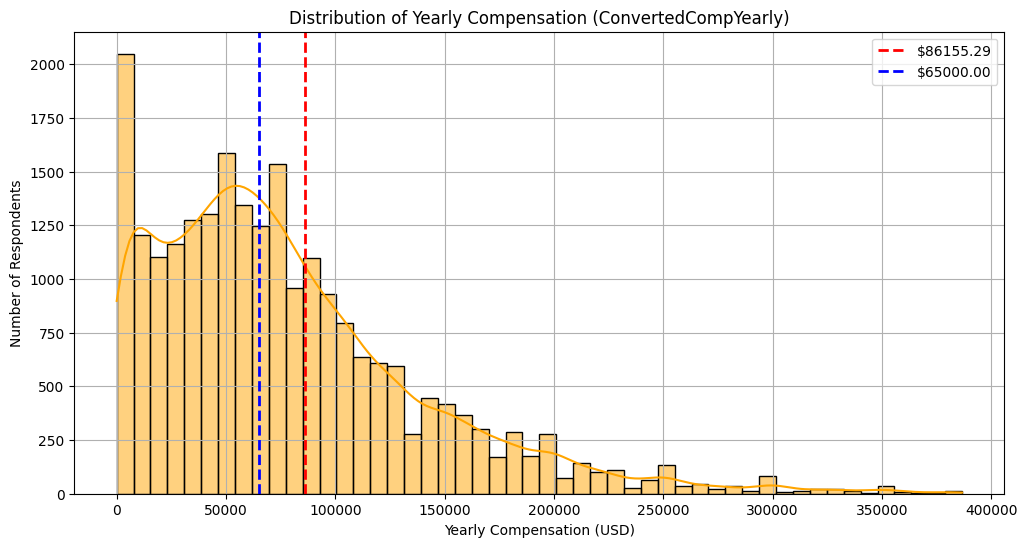

In [15]:
# Drop missing or extreme outliers
comp = df['ConvertedCompYearly'].dropna()
comp = comp[comp < comp.quantile(0.99)]  # Optional: remove top 1% to reduce skew

# Set plot size and style
plt.figure(figsize=(12, 6))
sns.histplot(comp, bins=50, kde=True, color='orange')
plt.title('Distribution of Yearly Compensation (ConvertedCompYearly)')
plt.xlabel('Yearly Compensation (USD)')
plt.ylabel('Number of Respondents')
# Add a vertical line for mean and median value
mean = df["ConvertedCompYearly"].mean()
plt.axvline(mean, color='red', label=f'${mean:.2f}', linestyle='dashed', linewidth= 2)

median = df["ConvertedCompYearly"].median()
plt.axvline(median, color='blue', label=f'${median:.2f}', linestyle='dashed', linewidth=2)
plt.grid(True)
plt.legend()
plt.show()

<h3>Step 4: Calculate Median Compensation for Full-Time Employees</h3>


**Task**: Filter the data to calculate the median compensation for respondents whose employment status is "Employed, full-time."


In [17]:
fulltime_employees = df[df["Employment"] == "Employed, full-time"]
median_full_comp = fulltime_employees["ConvertedCompYearly"].median()
print(f"Median compensation of full time employees (Yearly): ${median_full_comp}")

Median compensation of full time employees (Yearly): $69814.0


<h3>Step 5: Analyzing Compensation Range and Distribution by Country</h3>


Explore the range of compensation in the ConvertedCompYearly column by analyzing differences across countries. Use box plots to compare the compensation distributions for each country to identify variations and anomalies within each region, providing insights into global compensation trends.



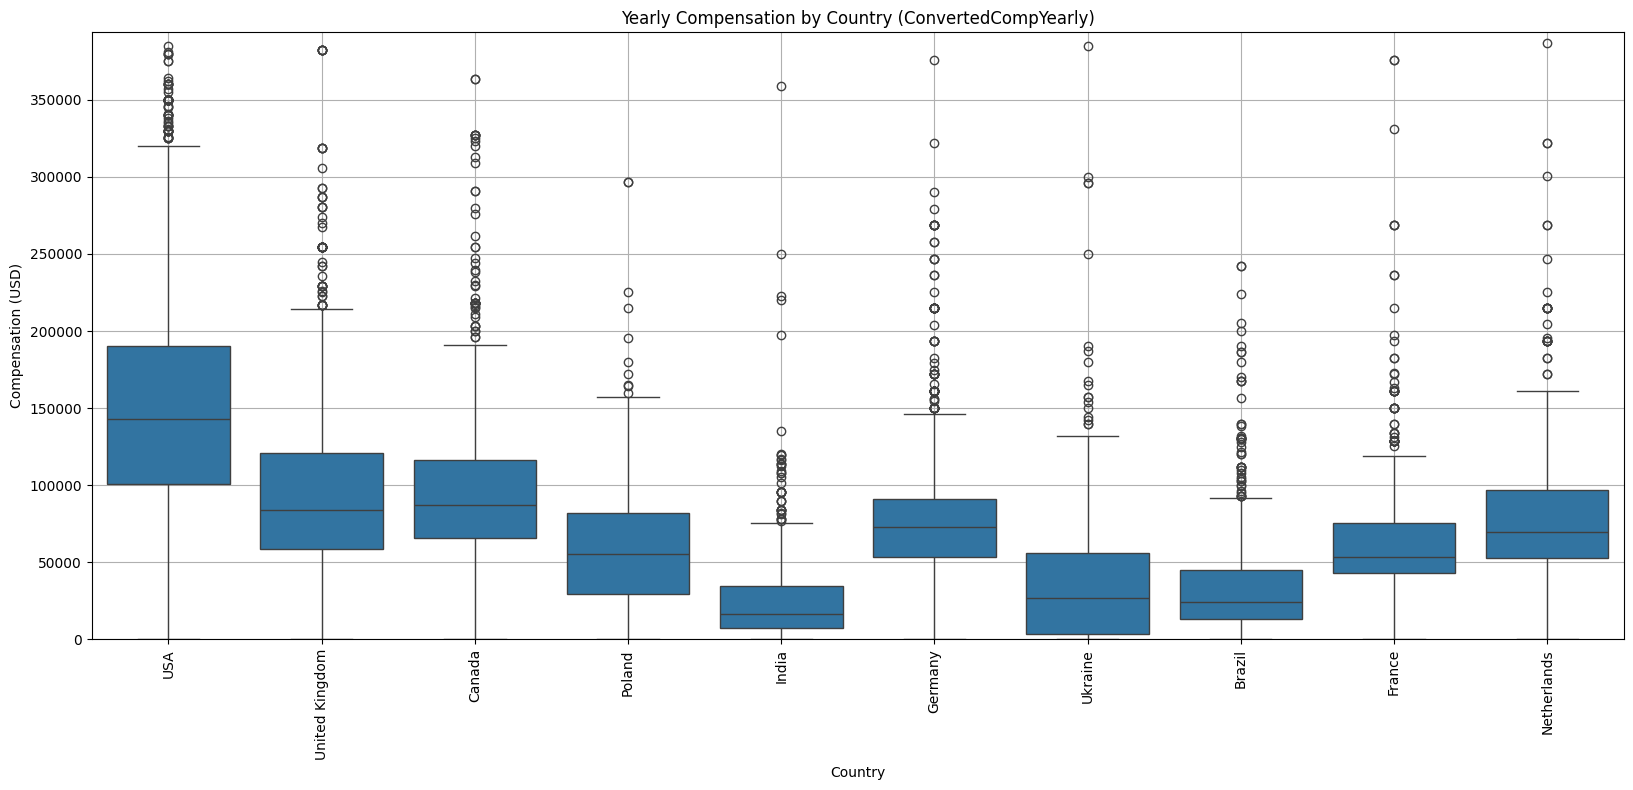

In [22]:
map_country = {'United States of America': 'USA',
               'United Kingdom of Great Britain and Northern Ireland': 'United Kingdom'}
df["Country"] = df["Country"].replace(map_country)

top_10_countries = df["Country"].value_counts().head(10).index

df_top_10_countries = df[df["Country"].isin(top_10_countries)]

# Plot box plot
plt.figure(figsize=(16, 8))
sns.boxplot(x='Country', y='ConvertedCompYearly', data=df_top_10_countries)
plt.xticks(rotation=90)
plt.title('Yearly Compensation by Country (ConvertedCompYearly)')
plt.ylabel('Compensation (USD)')
plt.xlabel('Country')
plt.grid(True)
plt.tight_layout()
# Limit x-axis to focus on the main distribution (e.g., up to 99th percentile)
upper_limit = df['ConvertedCompYearly'].quantile(0.99)
plt.ylim(0, upper_limit)
plt.show()

<h3>Step 6: Removing Outliers from the Dataset</h3>


**Task**: Create a new DataFrame by removing outliers from the `ConvertedCompYearly` column to get a refined dataset for correlation analysis.


In [23]:
# Drop missing values if any
comp_data = df['ConvertedCompYearly'].dropna()

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = comp_data.quantile(0.25)
Q3 = comp_data.quantile(0.75)
IQR = Q3 - Q1

# Calculate bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Q1: ${Q1:,.2f}")
print(f"Q3: ${Q3:,.2f}")
print(f"IQR: ${IQR:,.2f}")
print(f"Lower bound: ${lower_bound:,.2f}")
print(f"Upper bound: ${upper_bound:,.2f}")

Q1: $32,712.00
Q3: $107,971.50
IQR: $75,259.50
Lower bound: $-80,177.25
Upper bound: $220,860.75


In [24]:
# Create a new DataFrame excluding outliers
df_no_outliers = df[(df['ConvertedCompYearly'] >= lower_bound) & 
                    (df['ConvertedCompYearly'] <= upper_bound)]

In [25]:
#Validate the size of the new DataFrame
print(f"Original DataFrame size: {df.shape[0]} rows")
print(f"New DataFrame size (without outliers): {df_no_outliers.shape[0]} rows")
print(f"Number of rows removed: {df.shape[0] - df_no_outliers.shape[0]}")

Original DataFrame size: 65437 rows
New DataFrame size (without outliers): 22457 rows
Number of rows removed: 42980


<h3>Step 7: Finding Correlations Between Key Variables</h3>


**Task**: Calculate correlations between `ConvertedCompYearly`, `WorkExp`, and `JobSatPoints_1`. Visualize these correlations with a heatmap.


In [35]:
# Select relevant columns
columns_of_interest = ['ConvertedCompYearly', 'WorkExp', 'JobSatPoints_1']
df_corr = df_no_outliers[columns_of_interest].copy()

# Drop rows with missing values
df_corr.dropna(inplace=True)

# Calculate correlation matrix
corr_matrix = df_corr.corr()
corr_matrix

,ConvertedCompYearly,WorkExp,JobSatPoints_1
ConvertedCompYearly,1.000000,0.406993,-0.059643
WorkExp,0.406993,1.000000,-0.032388
JobSatPoints_1,-0.059643,-0.032388,1.000000


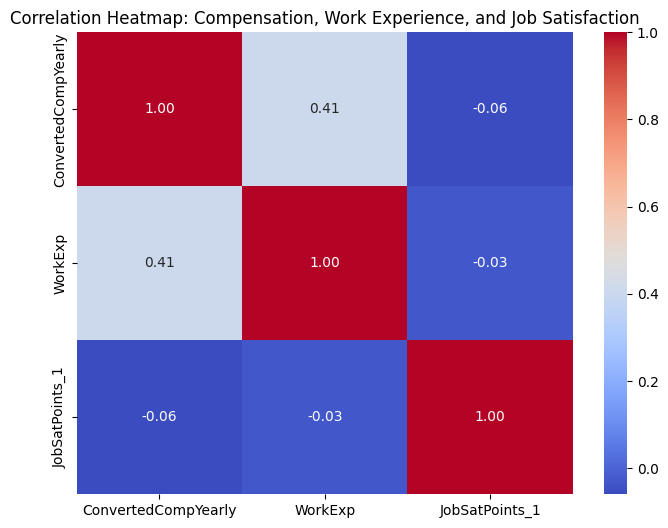

In [36]:
# Visualize with heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap: Compensation, Work Experience, and Job Satisfaction')
plt.show()

<h3>Step 8: Scatter Plot for Correlations</h3>


**Task**: Create scatter plots to examine specific correlations between `ConvertedCompYearly` and `WorkExp`, as well as between `ConvertedCompYearly` and `JobSatPoints_1`.


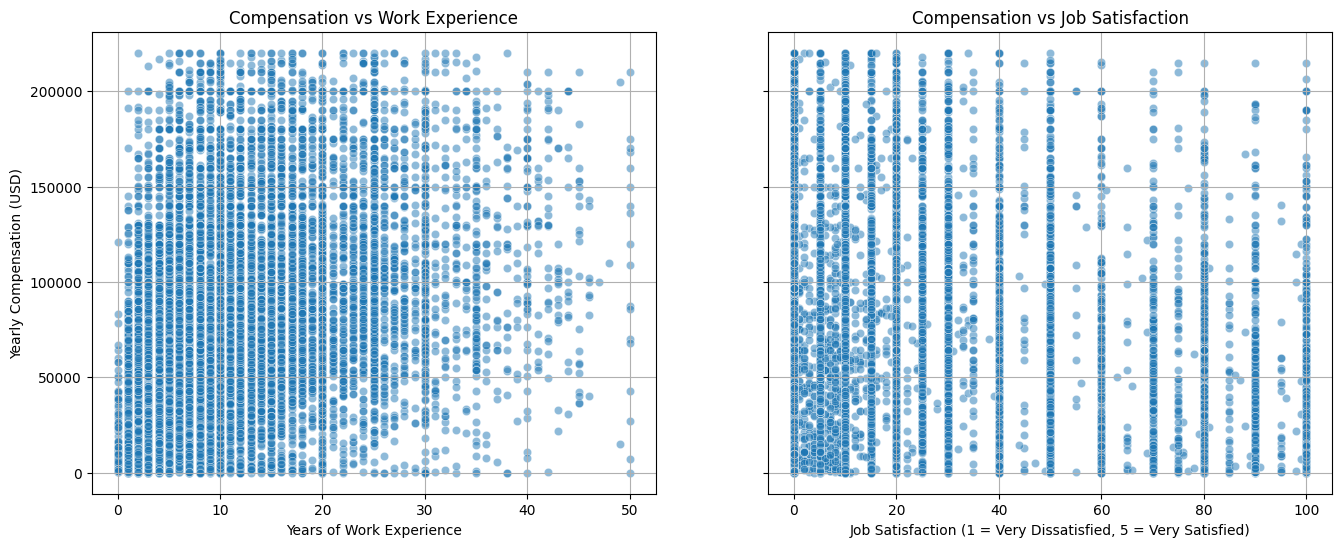

In [37]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Scatter plot: Compensation vs Work Experience
sns.scatterplot(data=df_no_outliers, x='WorkExp', y='ConvertedCompYearly', alpha=0.5, ax=axes[0])
axes[0].set_title('Compensation vs Work Experience')
axes[0].set_xlabel('Years of Work Experience')
axes[0].set_ylabel('Yearly Compensation (USD)')
axes[0].grid(True)

# Scatter plot: Compensation vs Job Satisfaction
sns.scatterplot(data=df_no_outliers, x='JobSatPoints_1', y='ConvertedCompYearly', alpha=0.5, ax=axes[1])
axes[1].set_title('Compensation vs Job Satisfaction')
axes[1].set_xlabel('Job Satisfaction (1 = Very Dissatisfied, 5 = Very Satisfied)')
axes[1].set_ylabel('')
axes[1].grid(True)